# Bank Customer Churn Prediction

Meredith | Mar 25th 2022

**Contect**: It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not. This dataset is originated from a U.S. bank.

# Part I Exploratory Data Analysis


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# drop unneccessary columns
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

## Cat vs Cat

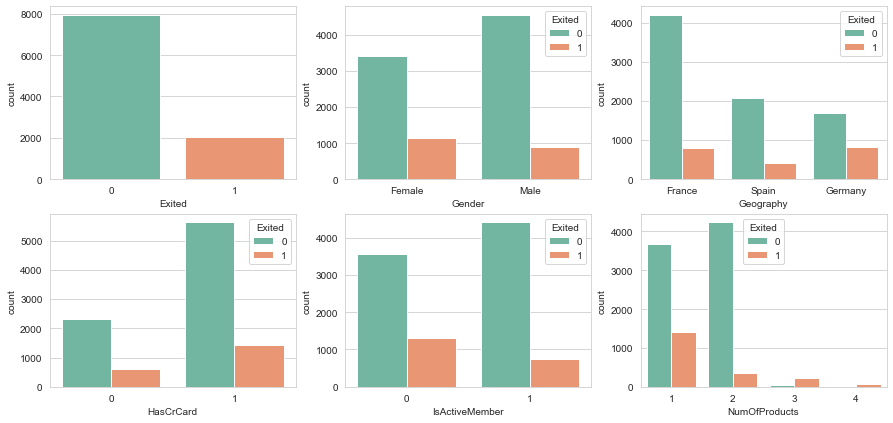

In [6]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3, figsize = (15, 7))
ax1 = sns.countplot(data = df, x = "Exited", palette=sns.color_palette("Set2"), ax=axes[0,0])
ax2 = sns.countplot(data = df, x = "Gender", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[0,1])
ax3 = sns.countplot(data = df, x = "Geography", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[0,2])
ax4 = sns.countplot(data = df, x= "HasCrCard", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[1,0])
ax5 = sns.countplot(data = df, x= "IsActiveMember", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[1,1])
ax6 = sns.countplot(data = df, x= "NumOfProducts", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[1,2])

## Cat vs Cont

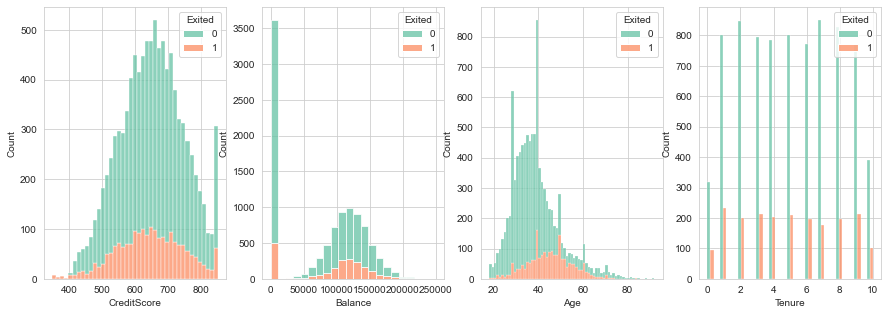

In [7]:
sns.set_palette("Set2",3)
f, ax = plt.subplots(1,4, figsize=(15,5))
ax1=sns.histplot(data = df, x='CreditScore', hue='Exited', multiple="stack", ax = ax[0])
ax2=sns.histplot(data = df, x='Balance', hue='Exited', multiple="stack", ax = ax[1])
ax3=sns.histplot(data = df, x='Age', hue='Exited', multiple="stack", ax = ax[2])
ax4=sns.histplot(data = df, x='Tenure', hue='Exited', multiple="dodge",ax = ax[3])

# Part II Classification

## Preprocessing

In [8]:
bank = df.copy()

In [9]:
bank['France'] = bank['Geography'].apply(lambda x:1 if x=='France' else 0)
bank['Germany'] = bank['Geography'].apply(lambda x:1 if x=='Germany' else 0)
bank['Spain'] = bank['Geography'].apply(lambda x:1 if x=='Spain' else 0)
bank['Gender_F'] = bank['Gender'].apply(lambda x:1 if x=='Female' else 0)
bank.drop(['Gender','Geography'], inplace=True, axis=1)
bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender_F
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [10]:
bank.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               int64
Germany              int64
Spain                int64
Gender_F             int64
dtype: object

**Then we need to split the data into two parts:**
1. The columns of data that we will use to make classifications
2. The column of data that we want to predict

In [11]:
X = bank.drop('Exited', axis=1).copy()
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Gender_F
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1


In [12]:
y = bank['Exited'].copy()
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Decision Trees

In [15]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

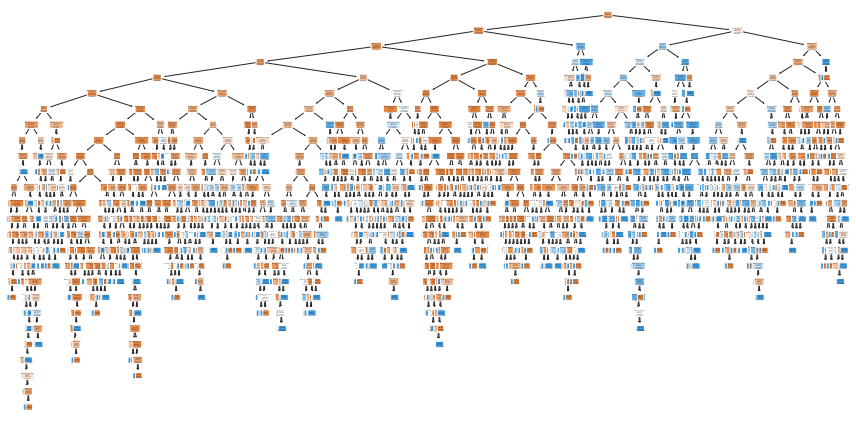

In [16]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['Exited','Not Exited'],
         feature_names = X.columns);

Let's see how it performs on the **Testing Dataset** by running the **Testing Dataset** down the tree and drawing a **Confusion Matrix**.

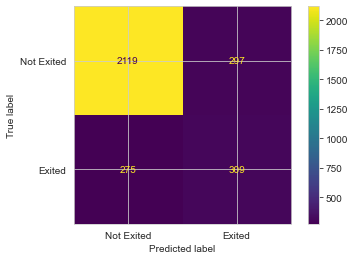

In [40]:
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels = ['Not Exited','Exited'])
disp.plot()
plt.show()

In the confusion matrix, we see that of **2119 + 297 = 2416** people that did not exit, **2119 / (2119 + 297) = 88%** were correctly classified. And of the **275 + 309 = 584** people who exited, **309 / (275 + 309) = 53%** were correctly classified. One thing that might be holding this classification tree back is that it may have **overfit the training dataset**. So Let's **prune** the tree. 

## Cost Complexity Pruning Part 1: Visualize alpha

**Decision Tree** is notorious for being overfit to the training dataset, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that improves the accuracy.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha`, which controls who little or how much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a function of different values. We'll do this for both the **training** and **testing**

First, let's extract the different values of `alpha` that are available for this tree and build a pruned tree for each value for `alpha`. **NOTE:** we omit the maximum value for alpha with `ccp_alpahs = ccp_alphas[:-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

In [42]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now we create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

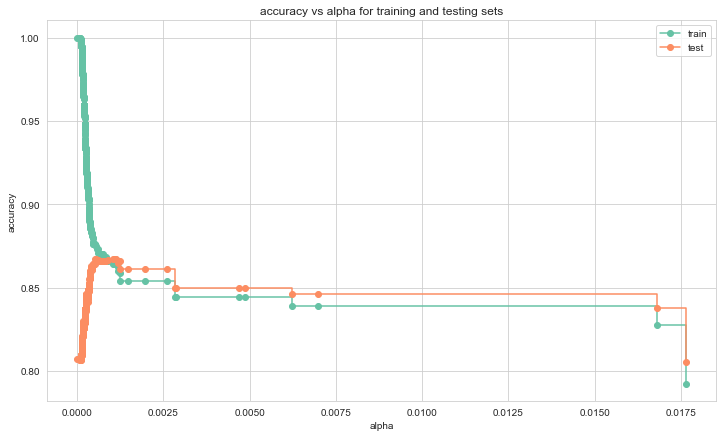

In [48]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **testing** hits its maximum value when `alpha` is about **0.0025**. After this value of `alpha`, the accuracy of the **training** drops off and that suggests w should set `ccp_alpha` = 0.016.

**NNOTE:** When we apply **cost complexity pruning** to classification tree, values for `alpha` go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for `alpha` for a **regression tree** can be much larger since the sum of squared residuals can, in theory, go from 0 to positive inifinity. 

## Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

The graph we just drew suggested one value for `alpha`, 0.0025, but another set of data might suggest another optimal value.

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set `ccp_alpha=0.016`